In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [8]:
# Data Cleaning
# EDA
# Text Processing
# Model Building
# Evaluation 
# Improvement 
# Website 
# Deploy

# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [11]:
df.rename(columns={'v1':'target', 'v2':'message'},inplace=True)

In [12]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Labeling target categories 
1. Using Lambda
2. Label Encoding (--used to encode output variable)


In [14]:
df['target'].apply(lambda x: 1 if x =='spam' else 0)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['target'] = le.fit_transform(df['target'])

In [17]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Missing Value
df.isnull().sum()

target     0
message    0
dtype: int64

In [20]:
# Check for duplicated value
df.duplicated().sum()

403

In [21]:
# Droping Duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [23]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

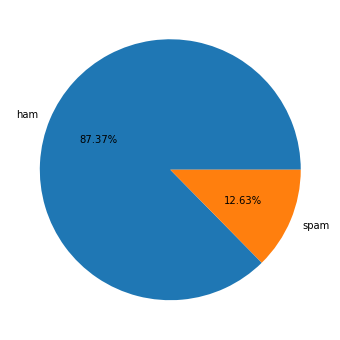

In [25]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

# Data is inbalance (ham is 88% and spam is 12%)

In [26]:
import nltk

In [27]:
#
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['message'].apply(len)

C:\Users\Hp\AppData\Local\Temp/ipykernel_11228/1098321106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


In [30]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
df['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [32]:
# Fetch Numnber of words in a text
df['num_words'] =df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Hp\AppData\Local\Temp/ipykernel_11228/305453010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] =df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [33]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [35]:
# Fetch Numnber of sentence in a text
df['num_sentences'] =df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Hp\AppData\Local\Temp/ipykernel_11228/2071805636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] =df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [36]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#Spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

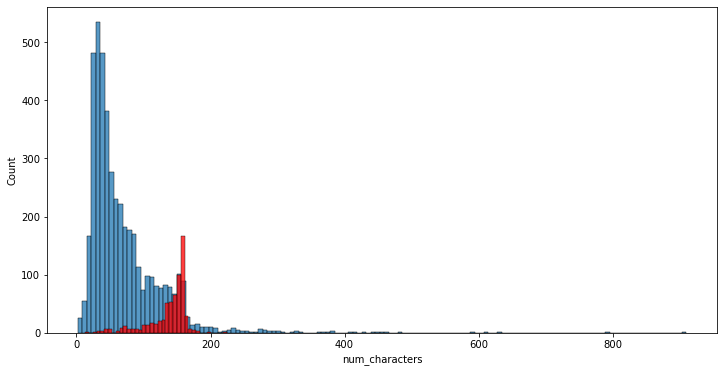

In [41]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

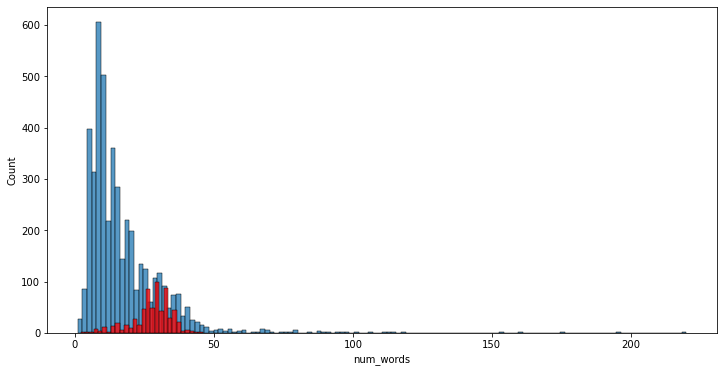

In [53]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

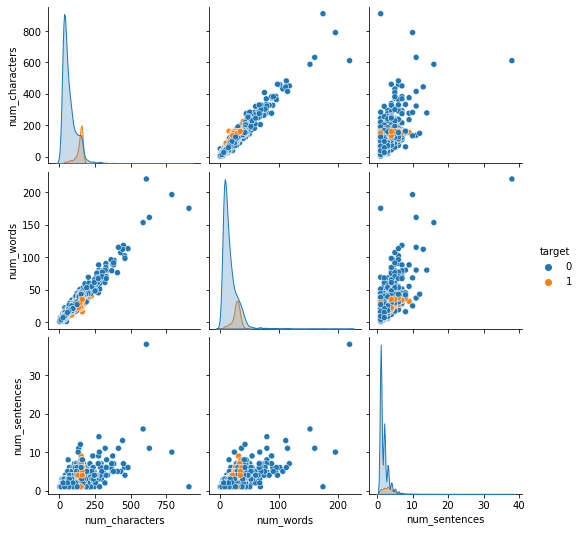

In [42]:
## To find the relation between Ham and Spam

sns.pairplot(df,hue='target')

<AxesSubplot:>

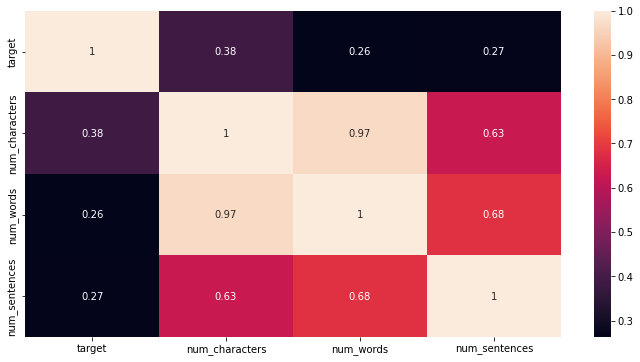

In [55]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Processing 
 . Lower Case
 . Tokenization
 . Removing special character
 . Removing stop words and punctuation 
 . Stemming

In [43]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    x = []
    for i in message:
        if i.isalnum():
            x.append(i)
    message = x[:] #We have to do cloning to clear the list otherwise it will remove everything.
    x.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    message = x[:]
    x.clear()
    for i in message:
        x.append(ps.stem(i))
    
    return " ".join(x)

In [44]:
from nltk.corpus import stopwords
import string  # To import punctuation in above fucntion

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [47]:
df['transform_message'] = df['message'].apply(transform_message)

C:\Users\Hp\AppData\Local\Temp/ipykernel_11228/1206780505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_message'] = df['message'].apply(transform_message)


In [48]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
# Spam WordCloud
spam_wc = wc.generate(df[df['target']==1]['transform_message'].str.cat(sep=" "))

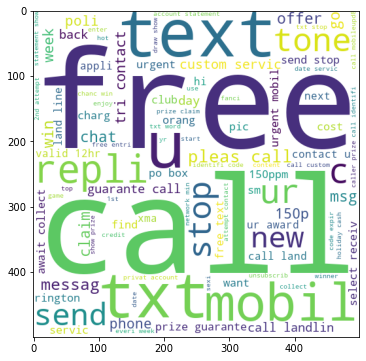

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

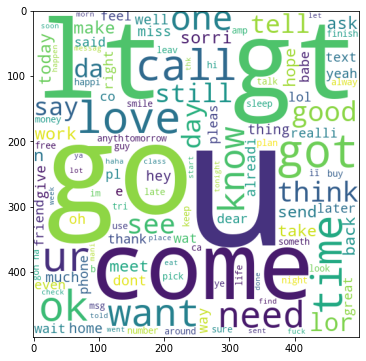

In [84]:
# Ham WordCloud
ham_wc = wc.generate(df[df['target']==0]['transform_message'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transform_message'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [53]:
len(spam_corpus)

9939

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


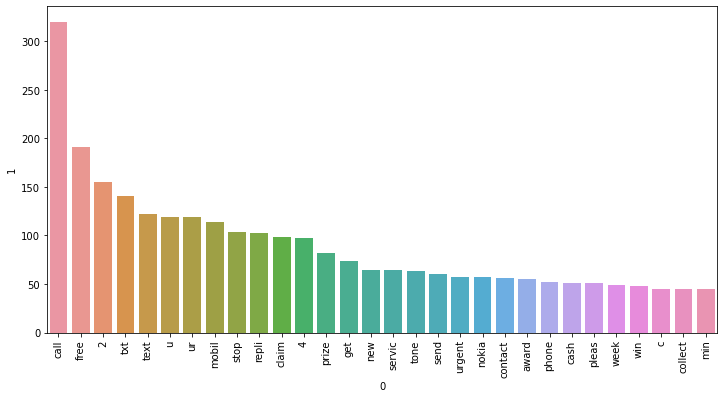

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_corpus = []
for msg in df[df['target']==0]['transform_message'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [97]:
len(ham_corpus)

35402

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


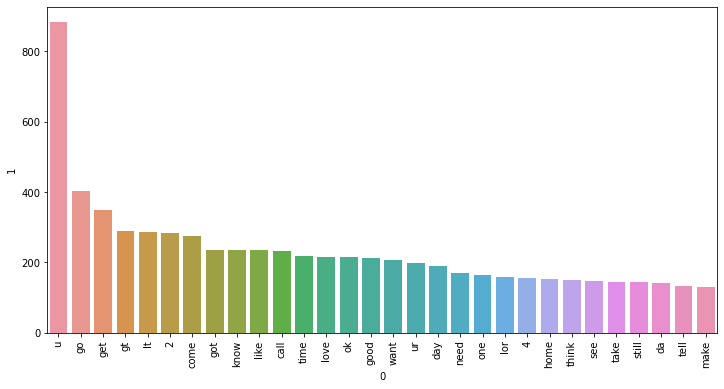

In [98]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#  4. Model Building

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.transform_message,df.target,test_size=.25)

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [148]:
X_train_count = cv.fit_transform(X_train.values).toarray()

In [149]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [150]:
emails= ['Hey mohan can we go for the  footbal game tomorrow',
        'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward '
        ]
emails_count= cv.transform(emails)
model.predict(emails_count)

array([0, 1])

In [152]:
# Sklern features pipeline to ease for the transformation of text data

from sklearn.pipeline import Pipeline
clf= Pipeline([('vectorizer', CountVectorizer()),
              ('nb', MultinomialNB())])


In [153]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [157]:
clf.score(X_test,y_test)

0.9891724671307038

In [158]:
clf.predict(emails)

array([0, 1])

# Accurate result with MultinomialNB using count vectorizer

#

# Random Forest with count vectorizer

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.transform_message,df.target,test_size=.25)

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values).toarray()

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_count,y_train)

RandomForestClassifier()

In [126]:
emails= ['Hey mohan can we go for the  footbal game tomorrow',
        'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward '
        ]
emails_count= cv.transform(emails).toarray()
rfmodel.predict(emails_count)

array([0, 0])

In [159]:
from sklearn.pipeline import Pipeline
clf= Pipeline([('vectorizer', CountVectorizer()),
              ('rf', RandomForestClassifier(n_estimators=1000))])


In [160]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier(n_estimators=1000))])

In [161]:
clf.score(X_test,y_test)

0.9760247486465584

In [162]:
clf.predict(emails)

array([0, 0])

# Random Forest using TfidVectorizer

In [138]:
from sklearn.pipeline import Pipeline
clf= Pipeline([('vectorizer', TfidfVectorizer()),
              ('rf', RandomForestClassifier(n_estimators=1000))])


In [163]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier(n_estimators=1000))])

In [164]:
clf.score(X_test,y_test)

0.9752513534416086

In [165]:
clf.predict(emails)

array([0, 0])